# Анализ бизнес-показателей. Оптимизация маркетинговых затрат

Данные с июня 2017 по конец мая 2018 года:  
- лог сервера с данными о посещениях сайта содержит идентификаторы пользователей, даты и время начала и окончания сессий, идентификаторы источника трафика, категории устройств пользователей;  
- выгрузка всех заказов за период содержит идентификаторы пользователей, даты и время заказов и их суммы;  
- статистика рекламных расходов содержит идентификаторы рекламных источников, даты проведения рекламных кампаний и расходы на них.   

Цель исследования - помочь маркетологам снизить расходы посредством отказа от невыгодных источников трафика и перераспределения бюджета.  

Для этого изучено:    
- как клиенты пользуются сервисом,  
- когда начинают делать первые покупки на сайте,  
- сколько денег приносит каждый клиент,  
- когда расходы на привлечение клиента окупаются.  
  
Выручка измеряется в условных единицах — у.е.

[1  Загрузка данных и подготовка их к анализу](#1)   
[2  Продуктовые метрики](#2)  
[2.1  Количество уникальных пользователей в день, неделю и месяц](#2.1)   
[2.2  Количество сессий в день](#2.2)   
[2.3  Продолжительность одной сессии](#2.3)    
[2.4  Расчет Retention Rate](#2.4)   
[3  Метрики электронной коммерции](#3)   
[3.1  Среднее время с момента первого посещения сайта до совершения покупки](#3.1)   
[3.2  Среднее количество покупок на одного покупателя за 6 месяцев](#3.2)   
[3.3  Средний чек](#3.3)    
[3.4  LTV](#3.4)   
[4  Маркетинговые метрики](#4)   
[4.1  Расходы на маркетинг](#4.1)   
[4.2  Стоимость привлечения клиента](#4.2)   
[4.3  ROMI](#4.3)   
[5  Выводы и рекомендации](#5)   

## Загрузка данных и подготовка их к анализу
<a id='1'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

visits = pd.read_csv('/datasets/visits_log.csv')
display(visits)
visits.info()
print('')
print('Процент пропусков в данных:')
print(visits.isna().mean()*100)

orders = pd.read_csv('/datasets/orders_log.csv')
display(orders)
orders.info()
print('')
print('Процент пропусков в данных:')
print(orders.isna().mean()*100)

costs = pd.read_csv('/datasets/costs.csv')
display(costs)
costs.info()
print('')
print('Процент пропусков в данных:')
print(costs.isna().mean()*100)

print('Количество дубликатов в датасете visits:', visits.duplicated().sum())
print('Количество дубликатов в датасете orders:', orders.duplicated().sum())
print('Количество дубликатов в датасете costs:', costs.duplicated().sum())

Device               End Ts  Source Id             Start Ts  \
0         touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1       desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2         touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3       desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4       desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   
...         ...                  ...        ...                  ...   
359395  desktop  2017-07-29 19:07:19          2  2017-07-29 19:07:00   
359396    touch  2018-01-25 17:38:19          1  2018-01-25 17:38:00   
359397  desktop  2018-03-03 10:12:19          4  2018-03-03 10:12:00   
359398  desktop  2017-11-02 10:12:19          5  2017-11-02 10:12:00   
359399    touch  2017-09-10 13:13:19          2  2017-09-10 13:13:00   

                         Uid  
0       16879256277535980062  
1         104060357244891740  
2        7459035603376831527  
3       16174680259334210214  
4        9969694820036681168  
...                      ...  
359395  18363291481961487539  
359396  18370831553019119586  
359397  18387297585500748294  
359398  18388616944624776485  
359399  18396128934054549559  

[359400 rows x 5 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

Процент пропусков в данных:
Device       0.0
End Ts       0.0
Source Id    0.0
Start Ts     0.0
Uid          0.0
dtype: float64


Buy Ts  Revenue                   Uid
0      2017-06-01 00:10:00    17.00  10329302124590727494
1      2017-06-01 00:25:00     0.55  11627257723692907447
2      2017-06-01 00:27:00     0.37  17903680561304213844
3      2017-06-01 00:29:00     0.55  16109239769442553005
4      2017-06-01 07:58:00     0.37  14200605875248379450
...                    ...      ...                   ...
50410  2018-05-31 23:50:00     4.64  12296626599487328624
50411  2018-05-31 23:50:00     5.80  11369640365507475976
50412  2018-05-31 23:54:00     0.30   1786462140797698849
50413  2018-05-31 23:56:00     3.67   3993697860786194247
50414  2018-06-01 00:02:00     3.42     83872787173869366

[50415 rows x 3 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

Процент пропусков в данных:
Buy Ts     0.0
Revenue    0.0
Uid        0.0
dtype: float64


source_id          dt  costs
0             1  2017-06-01  75.20
1             1  2017-06-02  62.25
2             1  2017-06-03  36.53
3             1  2017-06-04  55.00
4             1  2017-06-05  57.08
...         ...         ...    ...
2537         10  2018-05-27   9.92
2538         10  2018-05-28  21.26
2539         10  2018-05-29  11.32
2540         10  2018-05-30  33.15
2541         10  2018-05-31  17.60

[2542 rows x 3 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB

Процент пропусков в данных:
source_id    0.0
dt           0.0
costs        0.0
dtype: float64
Количество дубликатов в датасете visits: 0
Количество дубликатов в датасете orders: 0
Количество дубликатов в датасете costs: 0


In [2]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
orders.columns = ['buy_ts', 'revenue', 'uid']

visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['device'] = visits['device'].astype('category')
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

visits.info()
orders.info()
costs.info()

print(visits['device'].value_counts())
print(visits['source_id'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null category
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
desktop    262567
touch       96833
Nam

### Вывод

В данных нет пропусков и дубликатов. Колонки, содержащие дату и время, приведены к типу datetime. Тип данных в столбце device изменен на category.   
Для удобства в датасетах visits и orders наименования столбцов приведены к единому типу. 

## Продуктовые метрики
<a id='2'></a>

### Количество уникальных пользователей в день, неделю и месяц
<a id='2.1'></a>

In [3]:
visits['month'] = visits['start_ts'].astype('datetime64[M]')
visits['week']  = visits['start_ts'].astype('datetime64[W]')
visits['date'] = visits['start_ts'].dt.date

dau_total = visits.groupby('date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby('week').agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby('month').agg({'uid': 'nunique'}).mean()

print('Среднее количество уникальных пользователей в день за весь период:', int(dau_total))
print('Среднее количество уникальных пользователей в неделю за весь период:', int(wau_total)) 
print('Среднее количество уникальных пользователей в месяц за весь период:', int(mau_total)) 

Среднее количество уникальных пользователей в день за весь период: 907
Среднее количество уникальных пользователей в неделю за весь период: 5724
Среднее количество уникальных пользователей в месяц за весь период: 23228


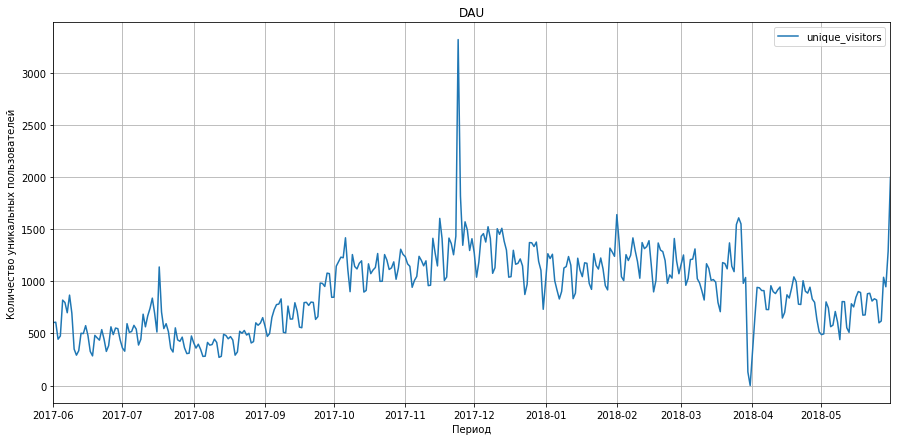

In [4]:
dau = visits.groupby('date').agg({'uid':'nunique'}).reset_index().rename(columns={'uid':'unique_visitors'})
wau = visits.groupby('week').agg({'uid':'nunique'}).reset_index().rename(columns={'uid':'unique_visitors'})
mau = visits.groupby('month').agg({'uid':'nunique'}).reset_index().rename(columns={'uid':'unique_visitors'})

def dwm(df, x, tit):
    df.plot(x = x, grid=True, title = tit, figsize = (15,7))
    plt.xlabel('Период')
    plt.ylabel('Количество уникальных пользователей')
    plt.show()
    
dwm(dau, 'date', 'DAU')

Наименьшее количество уникальных пользователей в день приходится на летние месяцы, также короткий резкий спад наблюдается в конце марта. Наибольшее количество пользователей в день было во второй половине ноября. Также небольшие пики наблюдаются в середине ноября, самом конце января и ближе к концу марта. В целом, наибольшее число уникальных пользователей в день было с октября по март. 

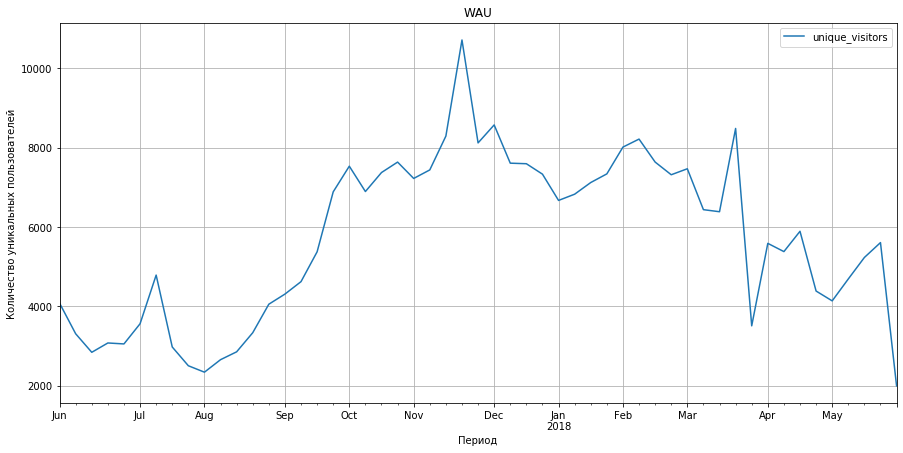

In [5]:
dwm(wau, 'week', 'WAU')

Наименьшее количество уникальных пользователей в неделю было в конце июля - начале августа, наибольшее - в начале второй половины ноября (более 10 тысяч). С начала августа еженедельное число уникальных пользователей стабильно увеличивалось до конца сентября, далее до резкого роста в середине ноября WAU существенно не изменялся. На начало января имело место заметное уменьшение показателя, после которого был рост в начале февраля, а также в середине марта. Далее наблюдалось снижение числа пользователей, после чего до конца рассматриваемого периода в неделю уже не приходило более 6000 уникальных пользователей. 

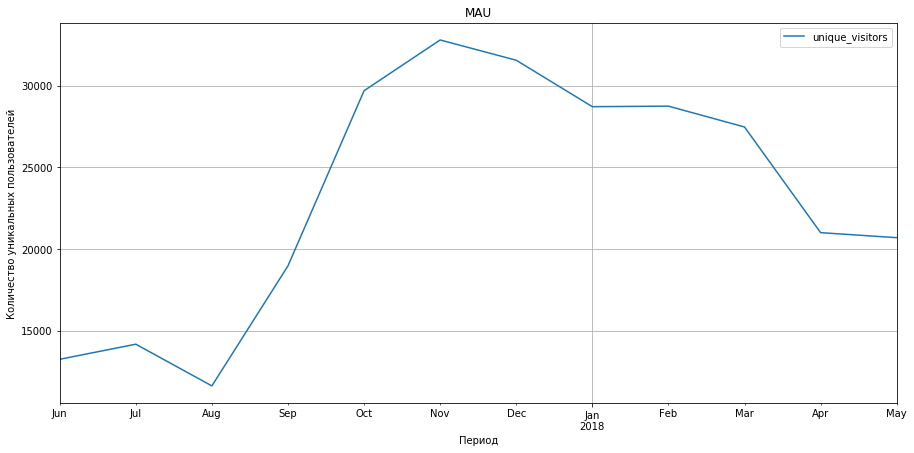

In [6]:
dwm(mau, 'month', 'MAU')

С июня по август было наименьшее количество уникальных пользователей в месяц. С августа по ноябрь MAU стабильно рос высокими темпами, а начиная с декабря начал постепенно снижаться ежемесячно, за исключением февраля. 

#### Вывод

Наименьшее количество уникальных пользователей приходится на летние месяцы и позднюю весну.  
Во второй половине осени, зимой, ранней весной наблюдается существенное увеличение числа уникальных пользователей. Особенно заметно увеличение активности в ноябре-декабре.  

### Количество сессий в день 
<a id='2.2'></a>

In [7]:
ses_day = visits.groupby('date').agg({'uid':['count', 'nunique']})
ses_day.columns = ['count_users', 'unique_users']
ses_day['sessions_per_user'] = ses_day['count_users'] / ses_day['unique_users']
print('Среднее количество сессий на одного пользователя в день:', round(ses_day['sessions_per_user'].mean(), 2))

Среднее количество сессий на одного пользователя в день: 1.08


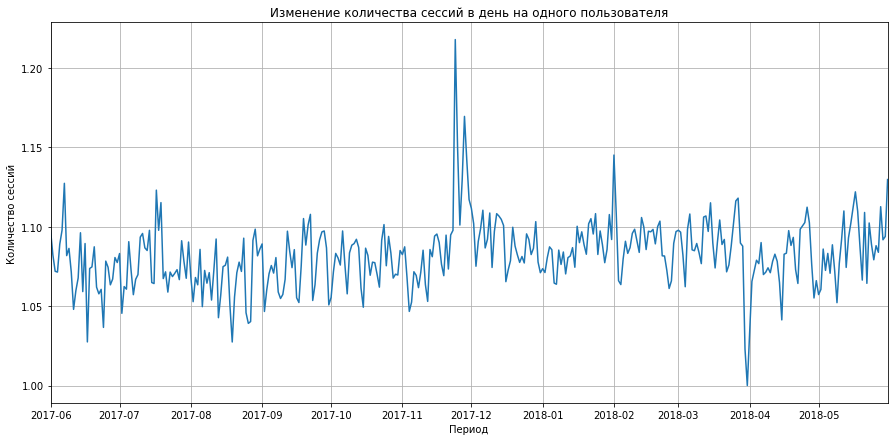

In [8]:
ses_day['sessions_per_user'].plot(
    grid=True, title = 'Изменение количества сессий в день на одного пользователя', figsize = (15,7))
plt.xlabel('Период')
plt.ylabel('Количество сессий')
plt.show()

#### Вывод

В среднем на одного пользователя приходится чуть больше 1 сессии в день. Таким образом, люди, как правило, не пользуются сервисом много раз в день. Разброс количества сессий на одного пользователя по году несущественный.  
Заметное увеличение количества сессий произошло только во второй половине декабря.

### Продолжительность одной сессии
<a id='2.3'></a>

In [9]:
visits['duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: duration_sec, dtype: float64

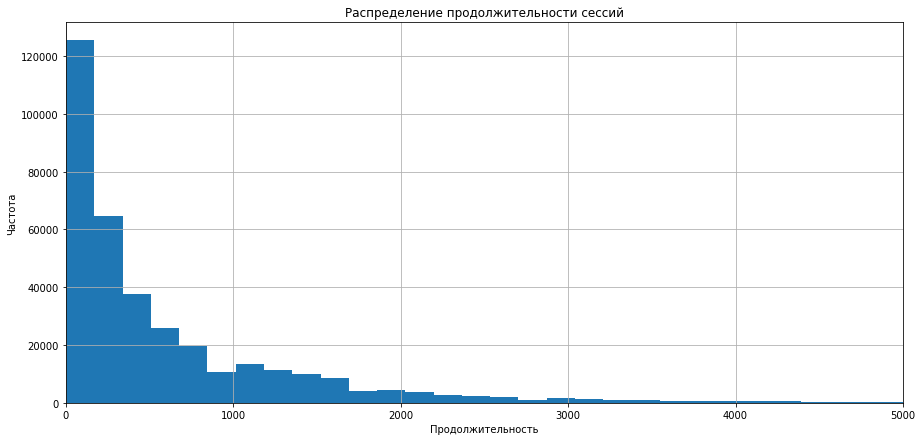

In [10]:
plt.figure(figsize = (15,7))
visits['duration_sec'].hist(bins=500).set(title = 'Распределение продолжительности сессий')
plt.xlim(0,5000)
plt.xlabel('Продолжительность')
plt.ylabel('Частота')
plt.show()

In [11]:
visits['duration_sec'].mode()[0]

60

#### Вывод

Минимальная продолжительность сессии равна 0, максимальная 84480 секунд (23,5 ч), что практически наверняка не является реальным временем, в течение которого пользователь использовал сервис. Средняя продолжительность сессии составляет 643 секунды или почти 11 минут, медиана - 300 секунд или 5 минут. На графике распределения продолжительности сессий видно, что большинство из них длится не дольше 2000 секунд или чуть больше 33 минут. Также из графика распределения ясно, что среднее - не лучший показатель типичной пользовательской сессии. Мода продолжительности сессии составляет 60 секунд. 

### Расчет Retention Rate
<a id='2.4'></a>

In [12]:
first_visits_date = visits.groupby(['uid'])['start_ts'].min().reset_index()
first_visits_date.columns = ['uid','first_visit_date']
first_visits_date

uid    first_visit_date
0             11863502262781 2018-03-01 17:27:00
1             49537067089222 2018-02-06 15:55:00
2            297729379853735 2017-06-07 18:47:00
3            313578113262317 2017-09-18 22:49:00
4            325320750514679 2017-09-30 14:29:00
...                      ...                 ...
228164  18446403737806311543 2017-11-30 03:36:00
228165  18446424184725333426 2017-12-06 20:32:00
228166  18446556406699109058 2018-01-01 16:29:00
228167  18446621818809592527 2017-12-27 13:27:00
228168  18446676030785672386 2017-10-04 16:01:00

[228169 rows x 2 columns]

In [13]:
first_visits_date['first_day'] = first_visits_date['first_visit_date'].dt.date
first_visits_date['first_month'] = first_visits_date['first_visit_date'].astype('datetime64[M]')
coh_visits = pd.merge(first_visits_date, visits, on = 'uid')
coh_visits['cohort_age_month'] = (
    (coh_visits['month'] - coh_visits['first_month']) / np.timedelta64(1, 'M')
).round().astype('int')
cohorts = coh_visits.groupby(['first_month','cohort_age_month']).agg({'uid':'nunique'}).reset_index() 
cohorts

first_month  cohort_age_month    uid
0   2017-06-01                 0  13259
1   2017-06-01                 1   1043
2   2017-06-01                 2    713
3   2017-06-01                 3    814
4   2017-06-01                 4    909
..         ...               ...    ...
73  2018-03-01                 1    861
74  2018-03-01                 2    557
75  2018-04-01                 0  15709
76  2018-04-01                 1    760
77  2018-05-01                 0  15273

[78 rows x 3 columns]

In [14]:
initial_users_count = cohorts[cohorts['cohort_age_month'] == 0][
    ['first_month', 'uid']
]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 
initial_users_count

first_month  cohort_users
0   2017-06-01         13259
12  2017-07-01         13140
23  2017-08-01         10181
33  2017-09-01         16704
42  2017-10-01         25977
50  2017-11-01         27248
57  2017-12-01         25268
63  2018-01-01         22624
68  2018-02-01         22197
72  2018-03-01         20589
75  2018-04-01         15709
77  2018-05-01         15273

In [15]:
cohorts = cohorts.merge(initial_users_count,on='first_month')
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users'] 
cohorts['first_month'] = cohorts['first_month'].dt.strftime('%Y-%m-%d')
cohorts

first_month  cohort_age_month    uid  cohort_users  retention
0   2017-06-01                 0  13259         13259   1.000000
1   2017-06-01                 1   1043         13259   0.078664
2   2017-06-01                 2    713         13259   0.053775
3   2017-06-01                 3    814         13259   0.061392
4   2017-06-01                 4    909         13259   0.068557
..         ...               ...    ...           ...        ...
73  2018-03-01                 1    861         20589   0.041818
74  2018-03-01                 2    557         20589   0.027053
75  2018-04-01                 0  15709         15709   1.000000
76  2018-04-01                 1    760         15709   0.048380
77  2018-05-01                 0  15273         15273   1.000000

[78 rows x 5 columns]

In [16]:
retention_pivot = cohorts.pivot_table(
    index='first_month',
    columns='cohort_age_month',
    values='retention',
    aggfunc='sum',
)
retention_pivot.fillna('')

cohort_age_month   0          1          2          3          4          5   \
first_month                                                                    
2017-06-01        1.0  0.0786635  0.0537748  0.0613923  0.0685572  0.0714232   
2017-07-01        1.0  0.0560883  0.0512938  0.0561644  0.0582192  0.0481735   
2017-08-01        1.0   0.076908  0.0628622   0.062764  0.0500933  0.0440035   
2017-09-01        1.0  0.0854885   0.069205  0.0507064  0.0393918  0.0378352   
2017-10-01        1.0   0.078608  0.0522385  0.0389575  0.0342611  0.0322208   
2017-11-01        1.0   0.078281  0.0441133  0.0386817  0.0337272  0.0234146   
2017-12-01        1.0  0.0558018  0.0379927  0.0311065  0.0202628  0.0190359   
2018-01-01        1.0  0.0597153  0.0393388  0.0249735   0.020244              
2018-02-01        1.0  0.0570798  0.0254539  0.0200928                         
2018-03-01        1.0  0.0418184  0.0270533                                    
2018-04-01        1.0  0.0483799                                               
2018-05-01        1.0                                                          

cohort_age_month         6          7          8          9          10  \
first_month                                                               
2017-06-01        0.0610152  0.0577721  0.0523418  0.0508334  0.0406516   
2017-07-01        0.0453577  0.0457382  0.0388128  0.0286149  0.0274734   
2017-08-01        0.0363422  0.0394853  0.0278951  0.0260289              
2017-09-01        0.0358597  0.0241858  0.0228089                         
2017-10-01        0.0213651  0.0203642                                    
2017-11-01        0.0217998                                               
2017-12-01                                                                
2018-01-01                                                                
2018-02-01                                                                
2018-03-01                                                                
2018-04-01                                                                
2018-05-01                                                                

cohort_age_month         11  
first_month                  
2017-06-01        0.0449506  
2017-07-01                   
2017-08-01                   
2017-09-01                   
2017-10-01                   
2017-11-01                   
2017-12-01                   
2018-01-01                   
2018-02-01                   
2018-03-01                   
2018-04-01                   
2018-05-01

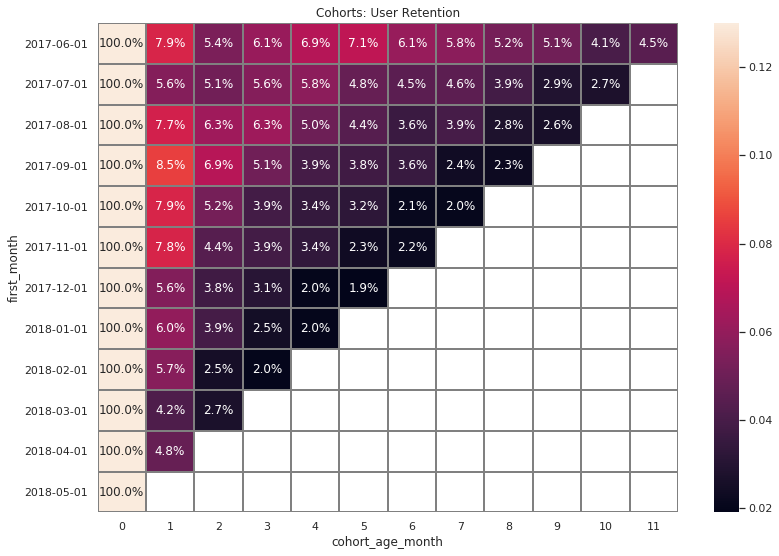

In [17]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax = 0.13)

In [18]:
print('Средний Retention Rate на второй месяц «жизни» когорт составляет: {:.1%}'.format(retention_pivot[1].mean()))

Средний Retention Rate на второй месяц «жизни» когорт составляет: 6.5%


In [19]:
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['buy_week']  = orders['buy_ts'].astype('datetime64[W]')
orders['buy_date'] = orders['buy_ts'].dt.date
first_orders_date = orders.groupby(['uid'])['buy_ts'].min().reset_index()
first_orders_date.columns = ['uid','first_order_date']
first_orders_date['first_order_day'] = first_orders_date['first_order_date'].dt.date
first_orders_date['first_order_month'] = first_orders_date['first_order_date'].astype('datetime64[M]')
coh_orders = pd.merge(first_orders_date, orders, on = 'uid')
coh_orders['cohort_age_month'] = (
    (coh_orders['buy_month'] - coh_orders['first_order_month']) / np.timedelta64(1, 'M')
).round().astype('int')
cohorts_ord = coh_orders.groupby(['first_order_month','cohort_age_month']).agg({'uid':'nunique'}).reset_index() 
initial_users_count_ord = cohorts_ord[cohorts_ord['cohort_age_month'] == 0][
    ['first_order_month', 'uid']
]
print(initial_users_count_ord) 
initial_users_count_ord = initial_users_count_ord.rename(columns={'uid':'cohort_buyers'}) 
cohorts_ord = cohorts_ord.merge(initial_users_count_ord,on='first_order_month')
cohorts_ord['retention'] = cohorts_ord['uid']/cohorts_ord['cohort_buyers'] 
cohorts_ord['first_order_month'] = cohorts_ord['first_order_month'].dt.strftime('%Y-%m-%d')
retention_pivot_ord = cohorts_ord.pivot_table(
    index='first_order_month',
    columns='cohort_age_month',
    values='retention',
    aggfunc='sum',
)

   first_order_month   uid
0         2017-06-01  2023
12        2017-07-01  1923
23        2017-08-01  1370
33        2017-09-01  2581
42        2017-10-01  4340
50        2017-11-01  4081
57        2017-12-01  4383
63        2018-01-01  3373
68        2018-02-01  3651
72        2018-03-01  3533
75        2018-04-01  2276
77        2018-05-01  2988
78        2018-06-01     1


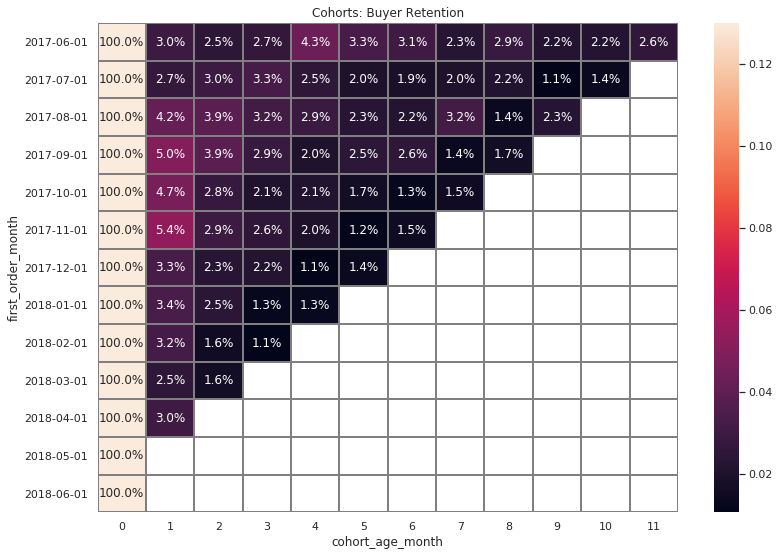

In [20]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Buyer Retention')
sns.heatmap(retention_pivot_ord, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax = 0.13)

#### Вывод

Очень небольшая часть пользователей возвращается в последующие периоды.  
Retention Rate выше у тех пользователей, которые впервые пришли в месяцах 2017 года, особенно в июне, августе и осенью. В целом, на всем сроке жизни когорт июня, августа и сентября retention rate выше, чем у остальных, но разница не очень большая.   
У всех когорт retention rate падает со временем. Средний retention rate на второй месяц «жизни» когорт составляет: 6.5%.  
У тех пользователей, которые покупали, retention rate еще ниже. Среди тех, кто впервые покупал в осенние месяцы, retention rate выше остальных. 

## Метрики электронной коммерции
<a id='3'></a>

### Среднее время с момента первого посещения сайта до совершения покупки
<a id='3.1'></a>

In [21]:
first_visits_orders = pd.merge(first_visits_date, first_orders_date, on = 'uid')
first_visits_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 7 columns):
uid                  36523 non-null uint64
first_visit_date     36523 non-null datetime64[ns]
first_day            36523 non-null object
first_month          36523 non-null datetime64[ns]
first_order_date     36523 non-null datetime64[ns]
first_order_day      36523 non-null object
first_order_month    36523 non-null datetime64[ns]
dtypes: datetime64[ns](4), object(2), uint64(1)
memory usage: 2.2+ MB


In [22]:
first_visits_orders['first_day'] = pd.to_datetime(first_visits_orders['first_day'])
first_visits_orders['first_order_day'] = pd.to_datetime(first_visits_orders['first_order_day'])
first_visits_orders['days_from_visit_to_order'] = (
    (first_visits_orders['first_order_day'] - first_visits_orders['first_day']) / np.timedelta64(1, 'D')
).astype('int')

In [23]:
first_visits_orders['days_from_visit_to_order'].describe()

count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: days_from_visit_to_order, dtype: float64

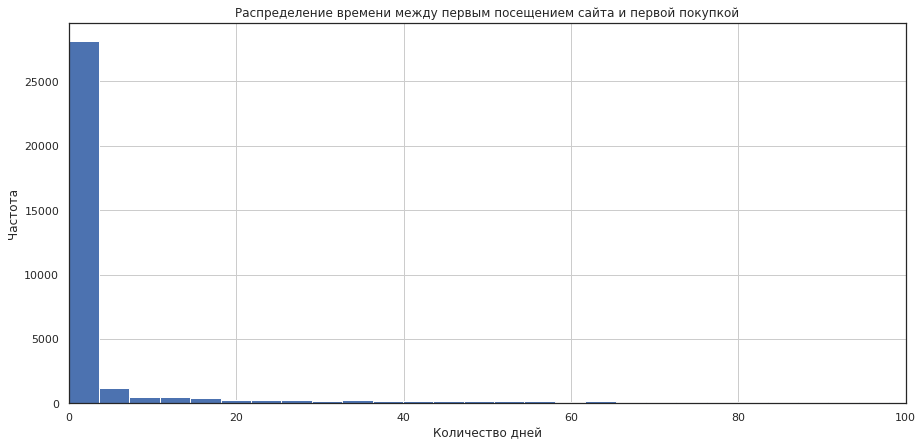

0

In [24]:
plt.figure(figsize = (15,7))
first_visits_orders['days_from_visit_to_order'].hist(bins=100).set(title = 'Распределение времени между первым посещением сайта и первой покупкой')
plt.xlim(0,100)
plt.xlabel('Количество дней')
plt.ylabel('Частота')
plt.show()

first_visits_orders['days_from_visit_to_order'].mode()[0]

#### Вывод

Среднее количество дней с момента первого посещения сайта до совершения покупки составляет чуть меньше 17, но на это значение очень сильно влияют единичные значения по 100-200-300 дней. Медиана и мода равны 0 дней. И на графике, ограниченном значением в 100 дней видно, что практически все видимые значения расположены в промежутке до 20 дней. Для данного типа распределения наиболее показательной мерой является мода, т.к. на среднее сильно влияют выбросы, а на медиану может влиять большое количество значений в длинном хвосте распределения. 
Таким образом, типичный пользователь сервиса заходит и сразу или почти сразу совершает покупку.  

### Среднее количество покупок на одного покупателя за 6 месяцев
<a id='3.2'></a>

In [25]:
orders_cnt = coh_orders.groupby(
    ['first_order_month', 'buy_month']).agg({'uid':'count'}).reset_index()
orders_cnt.columns = ['first_order_month', 'buy_month', 'orders_cnt']
orders_cnt = orders_cnt.merge(initial_users_count_ord, on = 'first_order_month')
orders_cnt['orders_per_buyer'] = orders_cnt['orders_cnt'] / orders_cnt['cohort_buyers']
orders_cnt['age'] = (
    (orders_cnt['buy_month'] - orders_cnt['first_order_month']) / np.timedelta64(1, 'M')
).round().astype('int')
orders_cnt

first_order_month  buy_month  orders_cnt  cohort_buyers  orders_per_buyer  \
0         2017-06-01 2017-06-01        2354           2023          1.163618   
1         2017-06-01 2017-07-01         177           2023          0.087494   
2         2017-06-01 2017-08-01         174           2023          0.086011   
3         2017-06-01 2017-09-01         226           2023          0.111715   
4         2017-06-01 2017-10-01         292           2023          0.144340   
..               ...        ...         ...            ...               ...   
74        2018-03-01 2018-05-01         176           3533          0.049816   
75        2018-04-01 2018-04-01        2495           2276          1.096221   
76        2018-04-01 2018-05-01         195           2276          0.085677   
77        2018-05-01 2018-05-01        3249           2988          1.087349   
78        2018-06-01 2018-06-01           1              1          1.000000   

    age  
0     0  
1     1  
2     2  
3     3  
4     4  
..  ...  
74    2  
75    0  
76    1  
77    0  
78    0  

[79 rows x 6 columns]

In [26]:
print('Среднее число покупок на одного покупателя за 6 месяцев:', orders_cnt[(orders_cnt['age']<=6)].groupby(
    'first_order_month').agg({'orders_per_buyer':'sum'}).mean()[0])

Среднее число покупок на одного покупателя за 6 месяцев: 1.3361429087394066


### Средний чек
<a id='3.3'></a>

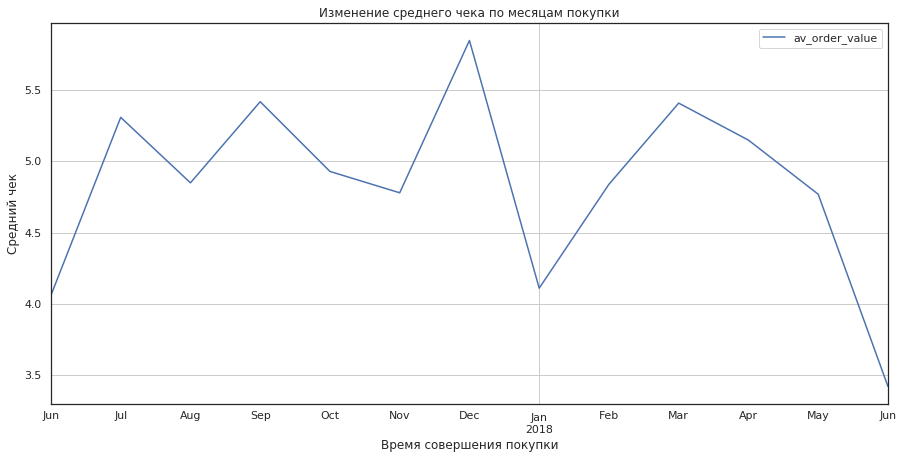

In [27]:
av_month = orders.groupby(['buy_month']).agg({'revenue':['sum' , 'count']}).reset_index()
av_month.columns = ['buy_month', 'rev_sum', 'cnt_orders']
av_month['av_order_value'] = round(av_month['rev_sum'] / av_month['cnt_orders'],2)
av_month
av_month.pivot_table(index = 'buy_month', values = 'av_order_value').plot(grid=True, title = 'Изменение среднего чека по месяцам покупки', figsize = (15,7))
plt.xlabel('Время совершения покупки')
plt.ylabel('Средний чек')
plt.show()

av_week = orders.groupby(['buy_week']).agg({'revenue':['sum' , 'count']}).reset_index()
av_week.columns = ['buy_week', 'rev_sum', 'cnt_orders']
av_week['av_order_value'] = round(av_week['rev_sum'] / av_week['cnt_orders'],2)
av_week
fig = px.line(av_week, x="buy_week", y="av_order_value", title='Изменение среднего чека по неделям покупки')
fig.show()

av_date = orders.groupby(['buy_date']).agg({'revenue':['sum' , 'count']}).reset_index()
av_date.columns = ['buy_date', 'rev_sum', 'cnt_orders']
av_date['av_order_value'] = round(av_date['rev_sum'] / av_date['cnt_orders'],2)
av_date
fig = px.line(av_date, x="buy_date", y="av_order_value", title='Изменение среднего чека по дням покупки')
fig.show()

Средний чек составляет около 5 у.е., наибольшее значение приходится на декабрь. В целом, в течение года сумма среднего чека, посчитанная помесячно и понедельно, постоянно прыгает, но примерно в одном диапазоне, и меняется несущественно. По дням средний чек также значительно не меняется, за исключением 10 декарбя 2017, когда его сумма составила 29,13 у.е., и еще некоторого количества дней с суммой чуть более 10 у.е.

### LTV
<a id='3.4'></a>

In [28]:
coh_orders_new = coh_orders.groupby(['first_order_month', 'buy_month']).agg({'revenue':'sum'}).reset_index()
coh_orders_new = coh_orders_new.merge(initial_users_count_ord, on = 'first_order_month')
coh_orders_new['ltv'] = coh_orders_new['revenue'] / coh_orders_new['cohort_buyers']
coh_orders_new['cohort_age_month'] = (
    (coh_orders_new['buy_month'] - coh_orders_new['first_order_month']) / np.timedelta64(1, 'M')
).round().astype('int')
coh_orders_new['first_order_month'] = coh_orders_new['first_order_month'].dt.strftime('%Y-%m-%d')
coh_orders_new['buy_month'] = coh_orders_new['buy_month'].dt.strftime('%Y-%m-%d')
coh_orders_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 6 columns):
first_order_month    79 non-null object
buy_month            79 non-null object
revenue              79 non-null float64
cohort_buyers        79 non-null int64
ltv                  79 non-null float64
cohort_age_month     79 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 4.3+ KB


In [29]:
report = coh_orders_new.pivot_table(
    index='first_order_month', columns='cohort_age_month', values='ltv', aggfunc='mean'
).round(2).cumsum(axis=1)
report.fillna('') 

cohort_age_month     0     1     2      3      4      5      6      7      8   \
first_order_month                                                               
2017-06-01         4.72  5.21  5.65    6.6   7.62   8.36   9.31   9.89  10.44   
2017-07-01         6.01  6.35  6.97   7.33   7.51   7.67   7.79   7.93   8.09   
2017-08-01         5.28  5.75  6.21    6.6   7.09   7.37   7.58   7.99   8.28   
2017-09-01         5.64  6.76  7.28  11.26  11.66  12.31  13.01  13.25  13.43   
2017-10-01         5.00  5.54  5.73   5.89   6.04   6.16   6.24   6.36          
2017-11-01         5.15  5.55  5.75   6.07   6.22   6.27   6.38                 
2017-12-01         4.74     5  5.93      7   7.31   7.65                        
2018-01-01         4.14  4.43  4.73   4.87   4.93                               
2018-02-01         4.16  4.44  4.52   4.59                                      
2018-03-01         4.84  5.14  5.46                                             
2018-04-01         4.66  5.19                                                   
2018-05-01         4.66                                                         
2018-06-01         3.42                                                         

cohort_age_month      9      10     11  
first_order_month                       
2017-06-01         11.05  11.62  11.88  
2017-07-01          8.24    8.4         
2017-08-01          8.47                
2017-09-01                              
2017-10-01                              
2017-11-01                              
2017-12-01                              
2018-01-01                              
2018-02-01                              
2018-03-01                              
2018-04-01                              
2018-05-01                              
2018-06-01

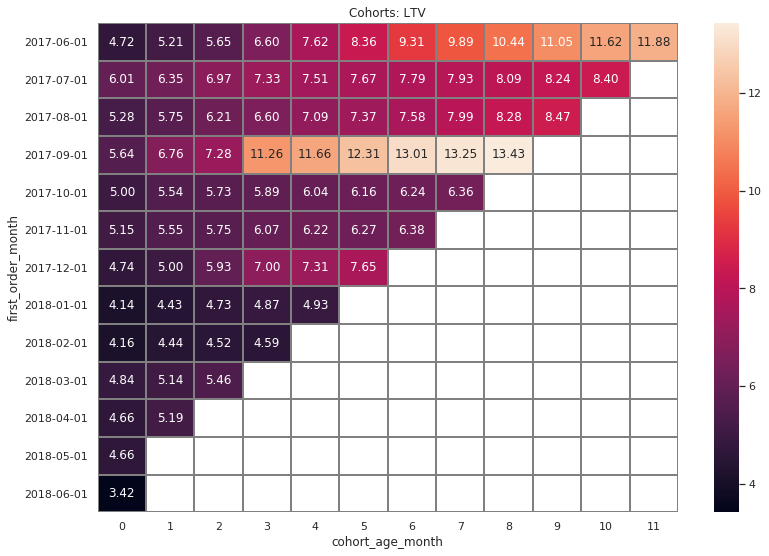

In [30]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: LTV')
sns.heatmap(report, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()

In [31]:
print('Средний LTV за 6 месяцев:', coh_orders_new[(coh_orders_new['buy_month']>='2017-12-01')].groupby(
    'first_order_month').agg({'ltv':'cumsum'}).mean()[0])

Средний LTV за 6 месяцев: 3.0314175130455574


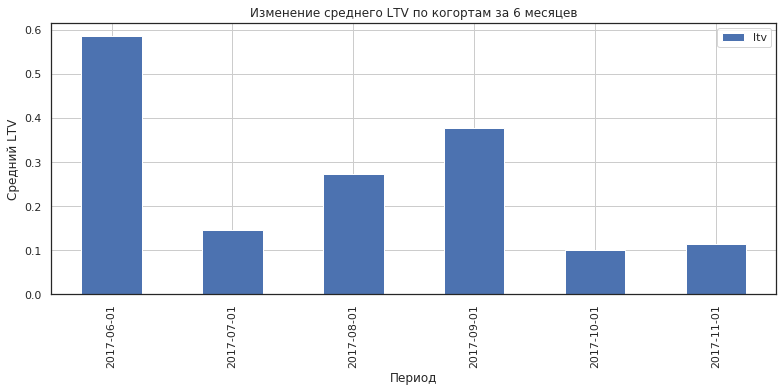

In [32]:
coh_orders_new[(coh_orders_new['cohort_age_month']>=6) & (coh_orders_new['buy_month']>='2017-12-01')].groupby(
    'first_order_month').agg({'ltv':'mean'}).plot(
    kind = 'bar', grid=True, title = 'Изменение среднего LTV по когортам за 6 месяцев', figsize = (13,5))
plt.xlabel('Период')
plt.ylabel('Средний LTV')
plt.show()

Среди когорт, "проживших" более 6 месяцев, самый высокий средний LTV за полгода у июньской когорты, самый низкий - у октябрьской и ноябрьской когорт. 

## Маркетинговые метрики
<a id='4'></a>

### Расходы на маркетинг
<a id='4.1'></a>

In [33]:
print('Общая сумма расходов на маркетинг составляет {} у.е.'.format(costs['costs'].sum()))

Общая сумма расходов на маркетинг составляет 329131.62 у.е.


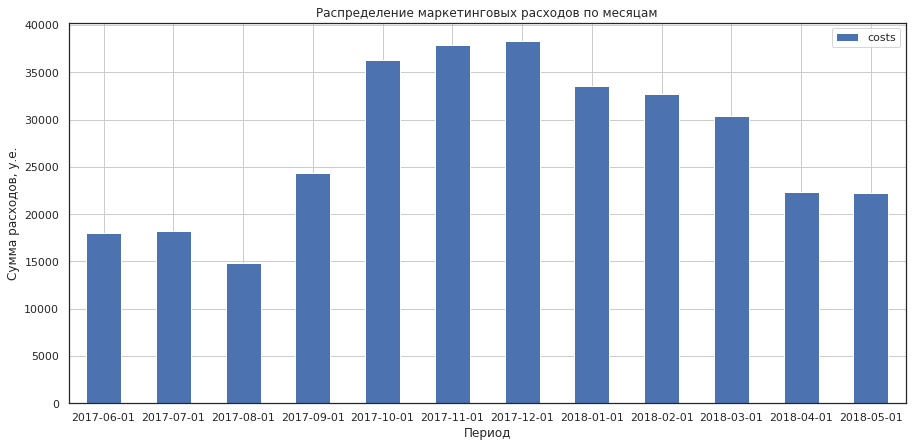

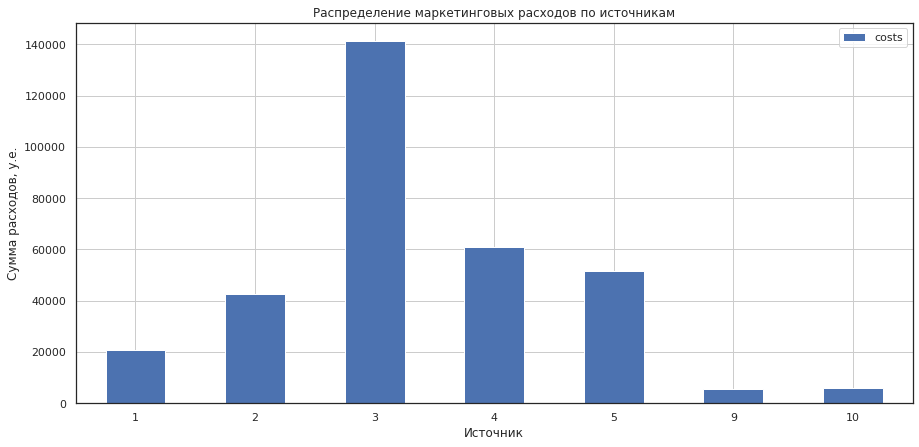

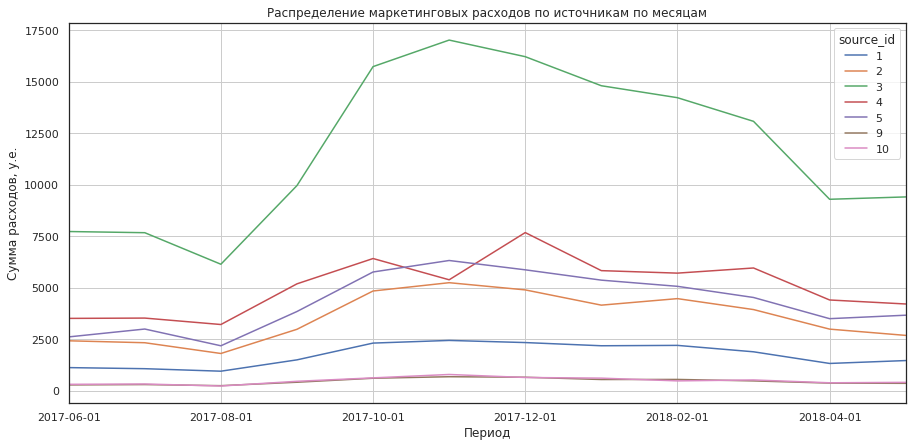

In [34]:
costs['cost_month'] = costs['dt'].astype('datetime64[M]')
costs['cost_month'] = costs['cost_month'].dt.strftime('%Y-%m-%d')
costs.pivot_table(index = 'cost_month', values = 'costs', aggfunc = 'sum').plot(
    kind = 'bar', rot = 0, grid=True, title = 'Распределение маркетинговых расходов по месяцам', figsize = (15,7))
plt.xlabel('Период')
plt.ylabel('Сумма расходов, у.е.')
plt.show()

costs.pivot_table(index = 'source_id', values = 'costs', aggfunc = 'sum').plot(
    kind = 'bar', rot = 0, grid=True, title = 'Распределение маркетинговых расходов по источникам', figsize = (15,7))
plt.xlabel('Источник')
plt.ylabel('Сумма расходов, у.е.')
plt.show()

costs.pivot_table(index = 'cost_month', columns = 'source_id', values = 'costs', aggfunc = 'sum').plot(
    grid=True, title = 'Распределение маркетинговых расходов по источникам по месяцам', figsize = (15,7))
plt.xlabel('Период')
plt.ylabel('Сумма расходов, у.е.')
plt.show()


In [35]:
orders['revenue'].sum()


252057.19999999998

#### Вывод

Общая сумма расходов на маркетинг составила 329131.62 у.е., что существенно превышает сумму полученной за тот же период выручки.   
Больше всего на маркетинг было потрачено с октября по декабрь 2017,  меньше всего - в августе 2017.  
Наибольшая сумма маркетинговых расходов приходится на источник 3, наименьшая - на 9 и 10.  
Помесячная динамика расходов по источнику 3 в целом совпадает с общей, по остальным источникам менее выражено изменение по месяцам, но динамика примерно та же, только по 4 источнику маркетинговые расходы за ноябрь ниже. 

### Стоимость привлечения клиента
<a id='4.2'></a>

In [36]:
print('Средний CAC на одного покупателя для всего проекта:', round(costs['costs'].sum() / orders['uid'].nunique(),2))

Средний CAC на одного покупателя для всего проекта: 9.01


In [37]:
cac = pd.merge(costs.groupby('cost_month').agg({'costs':'sum'}), coh_orders.groupby('first_order_month').agg({'uid':'nunique'}),
              left_index=True, right_index=True)
cac['cac'] = round((cac['costs'] / cac['uid']),2)
cac

costs   uid    cac
2017-06-01  18015.00  2023   8.91
2017-07-01  18240.59  1923   9.49
2017-08-01  14790.54  1370  10.80
2017-09-01  24368.91  2581   9.44
2017-10-01  36322.88  4340   8.37
2017-11-01  37907.88  4081   9.29
2017-12-01  38315.35  4383   8.74
2018-01-01  33518.52  3373   9.94
2018-02-01  32723.03  3651   8.96
2018-03-01  30415.27  3533   8.61
2018-04-01  22289.38  2276   9.79
2018-05-01  22224.27  2988   7.44

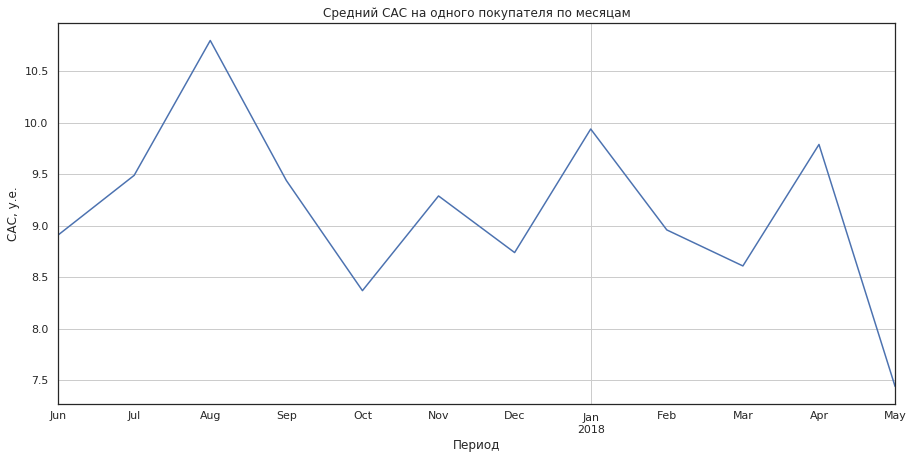

In [38]:
cac['cac'].plot(
    grid=True, title = 'Средний CAC на одного покупателя по месяцам', figsize = (15,7))
plt.xlabel('Период')
plt.ylabel('CAC, у.е.')
plt.show()

Самая высокая стоимость привлечения на одного покупателя была в августе, наименьшая - в мае. Кроме того, САС на одного покупателя был значительно выше в ноябре, январе и апреле, чем в октябре, декабре и марте. В эти месяцы, а также в июне и феврале САС был ниже среднего значения за весь период. 

In [39]:
visits_source = visits[['uid', 'start_ts', 'source_id']]
visits_source.columns = ['uid', 'first_visit_date', 'source_id']
visits_source = pd.merge(first_visits_date, visits_source, how = 'left', on=['uid','first_visit_date'])
visits_source['first_visit_month'] = visits_source['first_visit_date'].astype('datetime64[M]')
display(visits_source)
visits_source['source_id'].value_counts()

uid    first_visit_date   first_day first_month  \
0             11863502262781 2018-03-01 17:27:00  2018-03-01  2018-03-01   
1             49537067089222 2018-02-06 15:55:00  2018-02-06  2018-02-01   
2            297729379853735 2017-06-07 18:47:00  2017-06-07  2017-06-01   
3            313578113262317 2017-09-18 22:49:00  2017-09-18  2017-09-01   
4            325320750514679 2017-09-30 14:29:00  2017-09-30  2017-09-01   
...                      ...                 ...         ...         ...   
228165  18446403737806311543 2017-11-30 03:36:00  2017-11-30  2017-11-01   
228166  18446424184725333426 2017-12-06 20:32:00  2017-12-06  2017-12-01   
228167  18446556406699109058 2018-01-01 16:29:00  2018-01-01  2018-01-01   
228168  18446621818809592527 2017-12-27 13:27:00  2017-12-27  2017-12-01   
228169  18446676030785672386 2017-10-04 16:01:00  2017-10-04  2017-10-01   

        source_id first_visit_month  
0               3        2018-03-01  
1               2        2018-02-01  
2               3        2017-06-01  
3               2        2017-09-01  
4               5        2017-09-01  
...           ...               ...  
228165          5        2017-11-01  
228166          4        2017-12-01  
228167          3        2018-01-01  
228168          4        2017-12-01  
228169          3        2017-10-01  

[228170 rows x 6 columns]

4     72346
3     66116
5     49237
2     17616
1      9470
10     6903
9      6448
7        32
6         2
Name: source_id, dtype: int64

In [40]:
costs_gr = costs.groupby(['source_id', 'cost_month']).agg({'costs':'sum'}).reset_index()
costs_gr.columns = ['source_id', 'coh_month', 'costs']
costs_gr['coh_month'] = pd.to_datetime(costs_gr['coh_month'])

visits_source_c = visits_source.groupby(['source_id', 'first_visit_month']).agg({'uid':'count'}).reset_index()
visits_source_c.columns = ['source_id', 'coh_month', 'uid_cnt']

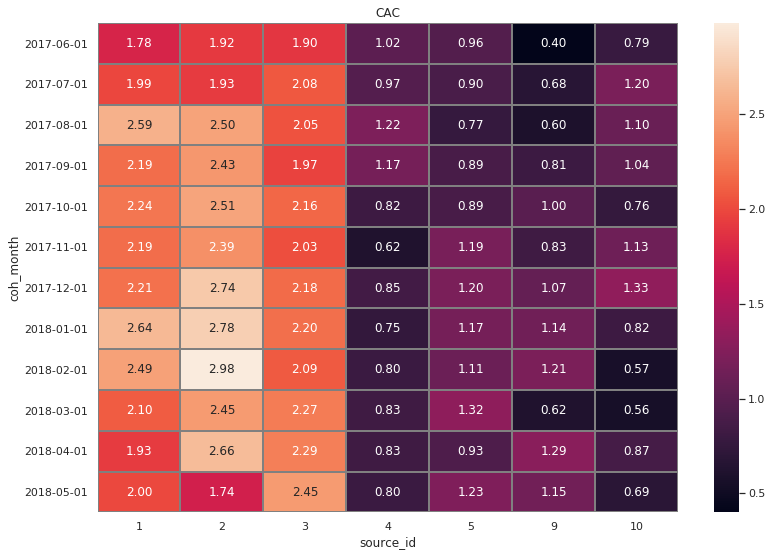

In [41]:
#САС на пользователя
report_cac_users = pd.merge(visits_source_c, costs_gr, on = ['source_id', 'coh_month'])
report_cac_users['coh_month'] = report_cac_users['coh_month'].dt.strftime('%Y-%m-%d')
report_cac_users['cac'] = round((report_cac_users['costs'] / report_cac_users['uid_cnt']),2)
report_report_cac_users = report_cac_users.pivot_table(
    index='coh_month', columns='source_id', values='cac', aggfunc='mean')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('CAC')
sns.heatmap(report_report_cac_users, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()


In [42]:
orders_source = pd.merge(coh_orders, visits_source, on = 'uid')
orders_source = orders_source[['uid', 'source_id', 'first_order_month', 'buy_month', 'revenue']]
orders_source = orders_source.groupby(['uid', 'source_id', 'first_order_month', 'buy_month']).agg(
    {'revenue':'sum'}).reset_index()
orders_source = pd.merge(orders_source, initial_users_count_ord, on = 'first_order_month')
orders_source

uid  source_id first_order_month  buy_month  revenue  \
0           313578113262317          2        2018-01-01 2018-01-01     0.55   
1          2464366381792757          5        2018-01-01 2018-01-01     2.44   
2          4808417689019433          4        2018-01-01 2018-01-01     1.22   
3         12436904862559956          3        2018-01-01 2018-01-01     0.24   
4         21801295586117262          1        2018-01-01 2018-01-01     1.22   
...                     ...        ...               ...        ...      ...   
41014  18376058541393893369          3        2017-07-01 2017-09-01     1.59   
41015  18376058541393893369          3        2017-07-01 2017-12-01     1.83   
41016  18386069411854663804          5        2017-07-01 2017-07-01    15.03   
41017  18404053948371855220         10        2017-07-01 2017-07-01     2.75   
41018     83872787173869366          4        2018-06-01 2018-06-01     3.42   

       cohort_buyers  
0               3373  
1               3373  
2               3373  
3               3373  
4               3373  
...              ...  
41014           1923  
41015           1923  
41016           1923  
41017           1923  
41018              1  

[41019 rows x 6 columns]

In [43]:
orders_source = orders_source.groupby(['source_id', 'first_order_month', 'buy_month', 'cohort_buyers']).agg({'revenue':'sum'}).reset_index()
orders_source.columns = ['source_id', 'coh_month', 'buy_month', 'cohort_buyers', 'revenue']
orders_source['cohort_age_month'] = (
    (orders_source['buy_month'] - orders_source['coh_month']) / np.timedelta64(1, 'M')
).round().astype('int')
orders_source

source_id  coh_month  buy_month  cohort_buyers  revenue  cohort_age_month
0            1 2017-06-01 2017-06-01           2023  1378.70                 0
1            1 2017-06-01 2017-07-01           2023   414.98                 1
2            1 2017-06-01 2017-08-01           2023   419.43                 2
3            1 2017-06-01 2017-09-01           2023   714.24                 3
4            1 2017-06-01 2017-10-01           2023   811.20                 4
..         ...        ...        ...            ...      ...               ...
511         10 2018-03-01 2018-03-01           3533   638.44                 0
512         10 2018-03-01 2018-04-01           3533    12.71                 1
513         10 2018-03-01 2018-05-01           3533     6.29                 2
514         10 2018-04-01 2018-04-01           2276   261.93                 0
515         10 2018-05-01 2018-05-01           2988   470.89                 0

[516 rows x 6 columns]

In [44]:
new_report = pd.merge(orders_source, costs_gr, on = ['source_id', 'coh_month'])
new_report['coh_month'] = new_report['coh_month'].dt.strftime('%Y-%m-%d')
new_report['buy_month'] = new_report['buy_month'].dt.strftime('%Y-%m-%d')
new_report['cac'] = round((new_report['costs'] / new_report['cohort_buyers']),2)
new_report

source_id   coh_month   buy_month  cohort_buyers  revenue  \
0            1  2017-06-01  2017-06-01           2023  1378.70   
1            1  2017-06-01  2017-07-01           2023   414.98   
2            1  2017-06-01  2017-08-01           2023   419.43   
3            1  2017-06-01  2017-09-01           2023   714.24   
4            1  2017-06-01  2017-10-01           2023   811.20   
..         ...         ...         ...            ...      ...   
509         10  2018-03-01  2018-03-01           3533   638.44   
510         10  2018-03-01  2018-04-01           3533    12.71   
511         10  2018-03-01  2018-05-01           3533     6.29   
512         10  2018-04-01  2018-04-01           2276   261.93   
513         10  2018-05-01  2018-05-01           2988   470.89   

     cohort_age_month    costs   cac  
0                   0  1125.61  0.56  
1                   1  1125.61  0.56  
2                   2  1125.61  0.56  
3                   3  1125.61  0.56  
4                   4  1125.61  0.56  
..                ...      ...   ...  
509                 0   526.41  0.15  
510                 1   526.41  0.15  
511                 2   526.41  0.15  
512                 0   388.25  0.17  
513                 0   409.86  0.14  

[514 rows x 8 columns]

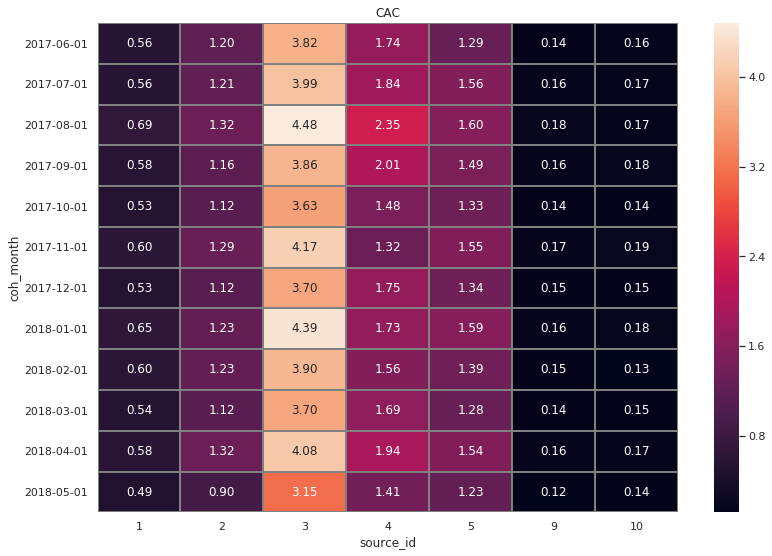

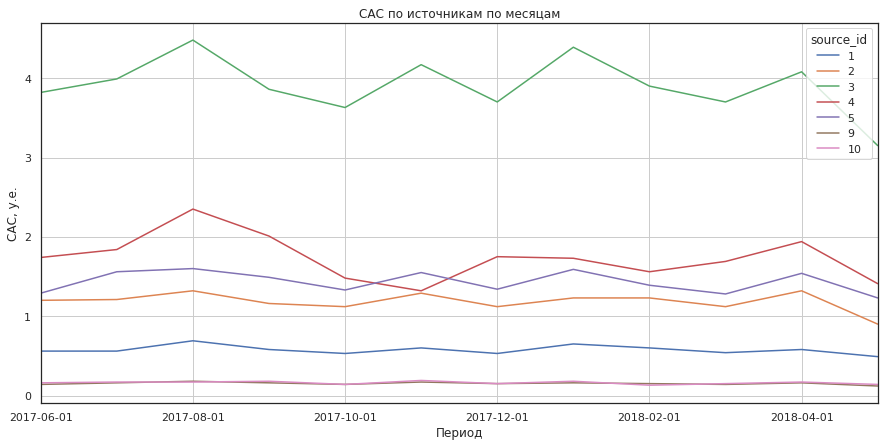

In [45]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('CAC')
sns.heatmap(new_report.pivot_table(
    index='coh_month', columns='source_id', values='cac', aggfunc='mean'), annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()

new_report.pivot_table(
    index='coh_month', columns='source_id', values='cac', aggfunc='mean').plot(
    grid=True, title = 'САС по источникам по месяцам', figsize = (15,7))
plt.xlabel('Период')
plt.ylabel('САС, у.е.')
plt.show()

#### Вывод

Самая высокая стоимость привлечения покупателя у источника 3, самая низкая - у источников 9 и 10.  
Во времени стоимость существенно не меняется, особенно у источников 1, 2, 9 и 10.

Если рассматривать стимость привлечения одного пользователя, то видно, что самыми дорогими источниками получаются 1, 2 и 3. 

### ROMI
<a id='4.2'></a>

In [46]:
new_report['ltv'] = new_report['revenue'] / new_report['cohort_buyers']
new_report['romi'] = new_report['ltv'] / new_report['cac']
new_report

source_id   coh_month   buy_month  cohort_buyers  revenue  \
0            1  2017-06-01  2017-06-01           2023  1378.70   
1            1  2017-06-01  2017-07-01           2023   414.98   
2            1  2017-06-01  2017-08-01           2023   419.43   
3            1  2017-06-01  2017-09-01           2023   714.24   
4            1  2017-06-01  2017-10-01           2023   811.20   
..         ...         ...         ...            ...      ...   
509         10  2018-03-01  2018-03-01           3533   638.44   
510         10  2018-03-01  2018-04-01           3533    12.71   
511         10  2018-03-01  2018-05-01           3533     6.29   
512         10  2018-04-01  2018-04-01           2276   261.93   
513         10  2018-05-01  2018-05-01           2988   470.89   

     cohort_age_month    costs   cac       ltv      romi  
0                   0  1125.61  0.56  0.681513  1.216987  
1                   1  1125.61  0.56  0.205131  0.366305  
2                   2  1125.61  0.56  0.207331  0.370233  
3                   3  1125.61  0.56  0.353060  0.630464  
4                   4  1125.61  0.56  0.400989  0.716051  
..                ...      ...   ...       ...       ...  
509                 0   526.41  0.15  0.180708  1.204717  
510                 1   526.41  0.15  0.003598  0.023983  
511                 2   526.41  0.15  0.001780  0.011869  
512                 0   388.25  0.17  0.115083  0.676962  
513                 0   409.86  0.14  0.157594  1.125669  

[514 rows x 10 columns]

In [47]:
output = new_report.pivot_table(
    index='coh_month', columns='cohort_age_month', values='romi', aggfunc='mean'
)
output.cumsum(axis=1).round(2).fillna('')

cohort_age_month    0     1     2     3     4     5     6     7     8     9   \
coh_month                                                                      
2017-06-01        0.69  0.78  0.89  1.08  1.28  1.41  1.58   1.7  1.81  1.91   
2017-07-01        0.73  0.78  0.94     1  1.04  1.08   1.1  1.13  1.16  1.19   
2017-08-01        0.68  0.74  0.81  0.87  0.93  0.97     1  1.07  1.13  1.16   
2017-09-01        0.68  0.85  0.93  1.35   1.4  1.48  1.57  1.62  1.67         
2017-10-01        0.78  0.86   0.9  0.92  0.95  0.98  0.99  1.01               
2017-11-01        0.71  0.76   0.8  0.85  0.87  0.88   0.9                     
2017-12-01        0.61  0.65  0.79  0.95     1  1.04                           
2018-01-01        0.47   0.5  0.54  0.56  0.57                                 
2018-02-01        0.57  0.61  0.62  0.63                                       
2018-03-01        0.80  0.86   0.9                                             
2018-04-01        0.56   0.6                                                   
2018-05-01        0.78                                                         

cohort_age_month    10    11  
coh_month                     
2017-06-01           2  2.07  
2017-07-01        1.23        
2017-08-01                    
2017-09-01                    
2017-10-01                    
2017-11-01                    
2017-12-01                    
2018-01-01                    
2018-02-01                    
2018-03-01                    
2018-04-01                    
2018-05-01

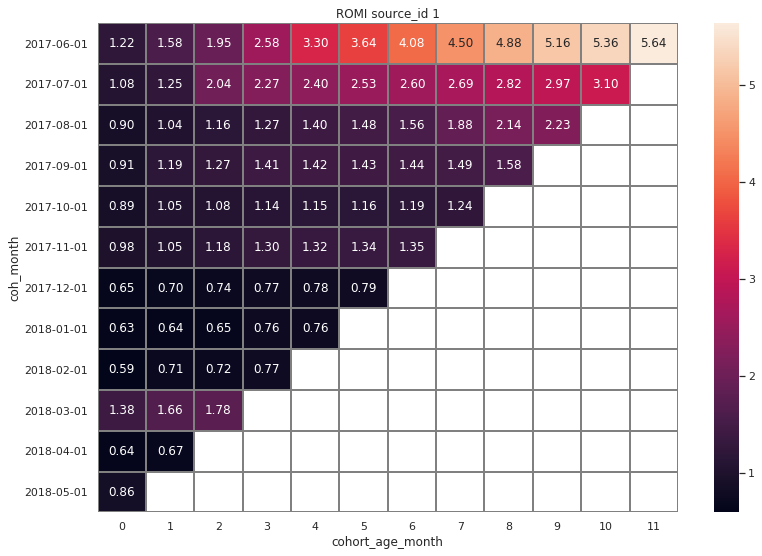

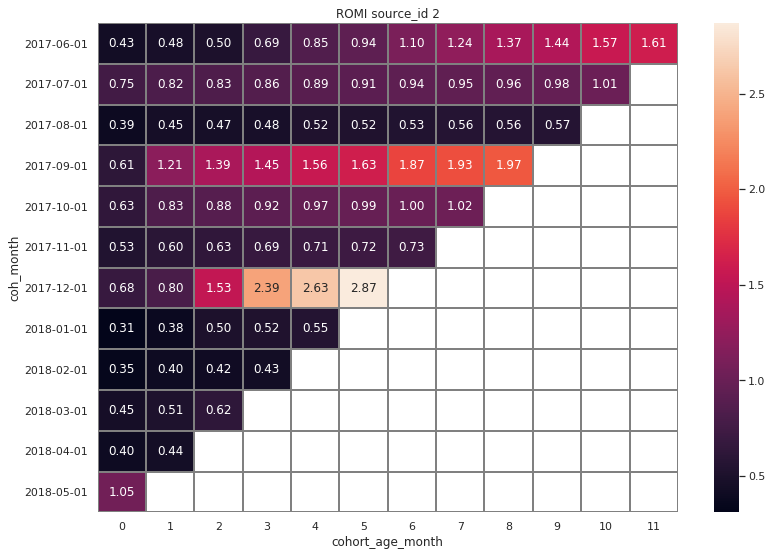

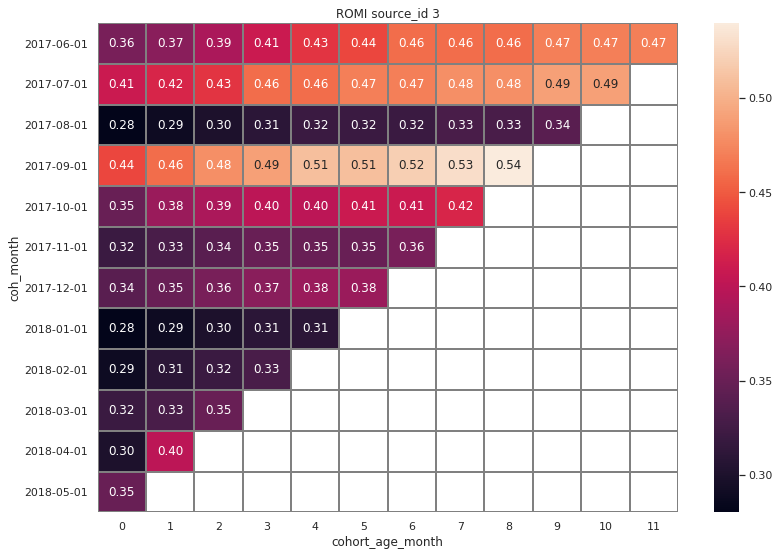

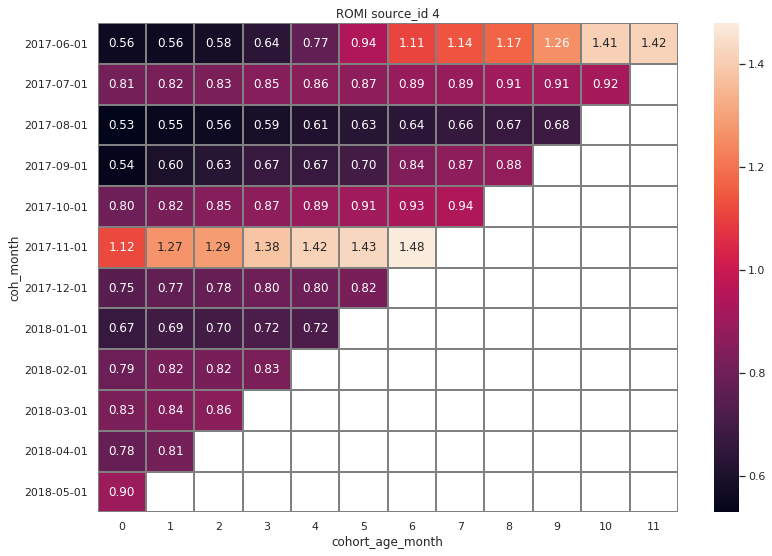

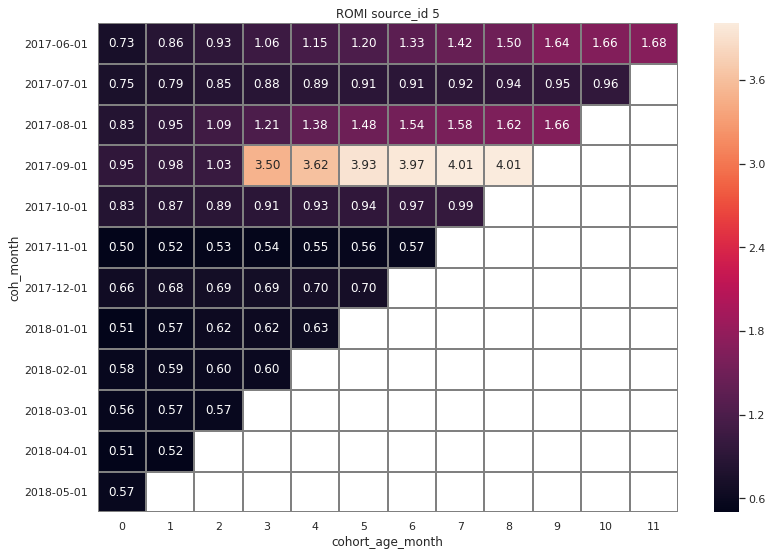

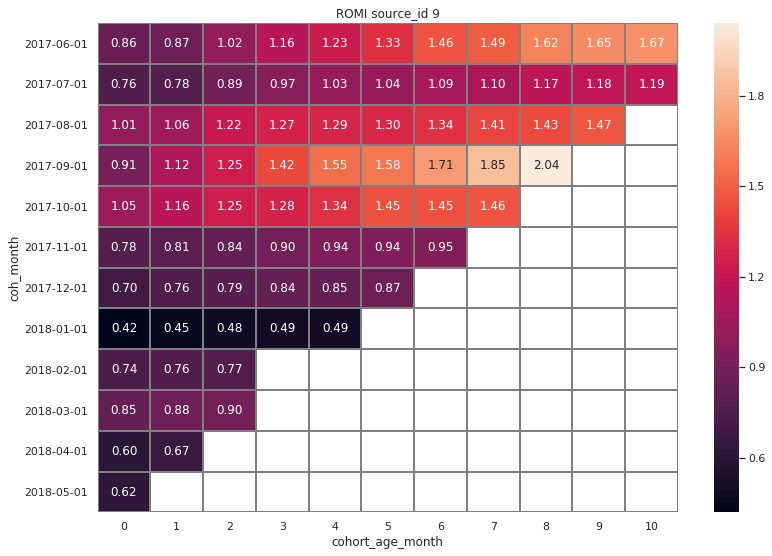

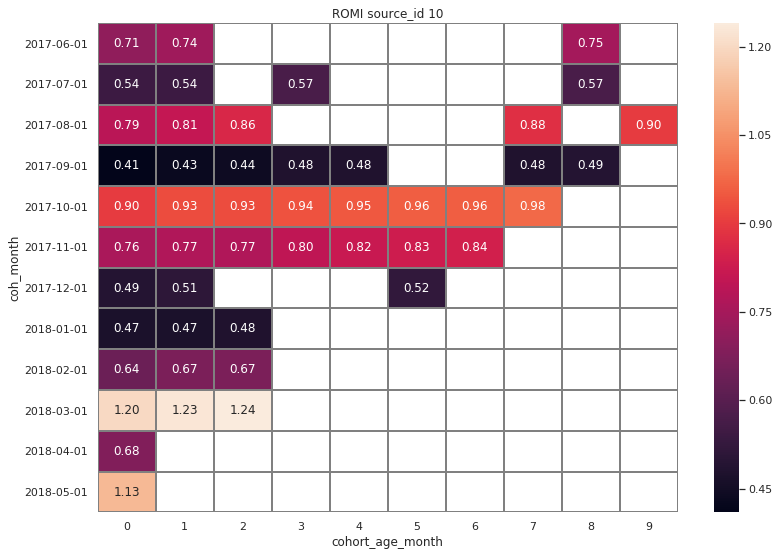

In [48]:
def romi(n):
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    plt.title('ROMI source_id {}'.format(n))
    sns.heatmap(new_report[new_report['source_id'] == n].pivot_table(
        index='coh_month', columns='cohort_age_month', values='romi', aggfunc='mean'
    ).cumsum(axis=1).round(2), annot=True, fmt='.2f', linewidths=1, linecolor='gray')
    plt.show()
    
list = [1, 2, 3, 4, 5, 9, 10]
for i in list:
    romi(i)     

#### Вывод

У первого источника в целом очень хорошая окупаемость. По большинству когорт затраты окупились уже на первый-второй месяц. У июньской и июльской когорты romi достигает очень хороших значений. Но при этом почти по всем когортам, начиная с декабрьской, за исключением мартовской, затраты не окупились и судя по тенденции не окупятся или окупятся очень не скоро.   

По второму источнику хорошие показатели romi у когорт сентября и декабря 2017. В первый же месяц окупились затраты по майской когорте. На шестой месяц жизни окупились затраты по когортам июня и октября, только на 10 месяц окупились затраты на июльскую когорту. По остальным когортам до окупаемости еще очень далеко.  

Из источника 3 хоть и пришло очень много людей (на втором месте по количеству), но затраты на него совершенно не окупаются. Только по двум когортам они окупились на половину – и это на 8 и 10 месяц. По остальным romi еще ниже.   

По 4 источнику тоже все грустно с окупаемостью, несмотря на то, что затраты по когорте ноября окупились сразу же. Затраты по июньской когорте окупились на 6 месяц, еще несколько «долгоживущих» когорт близки к окупаемости, но в целом значения romi по данному источнику низкие, затраты не окупаются.  

По пятому источнику быстрая окупаемость и  очень хорошие значения romi у когорты сентября, на второй-третий месяц окупились затраты по когортам июня и августа. Когорты октября и июля только подходят к тому, чтобы затраты по ним окупились, по более «молодым» когортам romi с самого начала был ниже, чем за аналогичные периоды у более ранних когорт, и увеличивается медленно.   

Быстро окупились затраты по когортам с июля по октябрь, пришедших из 9 источника. Особенно быстро растет romi по сентябрьской когорте. А затраты по когортам с ноябрьской и старше еще не окупились, выделяется когорта января, по которой очень низкий и очень медленно растущий romi.  

Интересно ведут себя когорты, пришедшие из 10 источника. Майская и мартовская окупились в первый же месяц. Близки к окупаемости когорты августа и октября. По остальным затратам еще далеко до того, чтобы окупиться. При этом из данного источника пришло относительно немного клиентов и далеко не в каждом месяце представители более ранних когорт приносят деньги. 

## Выводы и рекомендации
<a id='5'></a>

Летом пользователей меньше, поздней осенью, ранней весной и зимой - больше. Один пользователь в день пользуется сервисом в среднем один раз, чаще всего это занимает всего минуту. При этом те пользователи, которые совершают покупку, делают это, как правило, сразу в день посещения. Возвращаются в последующие периоды пользователи и покупатели редко. Средний чек составляет около 5 у.е., наибольшее значение приходится на декабрь.  
Общая сумма расходов на маркетинг составляет 329131.62 у.е. и заметно превышает сумму полученной за этот же период выручки.
Больше всего на маркетинг было потрачено с октября по декабрь 2017, меньше всего - в августе 2017.  
Самая высокая стоимость привлечения покупателя у источника 3, самая низкая - у источников 9 и 10.  

Наиболее перспективными источниками трафика выглядят 1, 2, 9 и 10. При этом, следует обратить внимание, что по 1 и 2 источнику стал ниже romi по новым когортам. Или что-то не так с маркетинговыми кампаниями или данные источники теряют свою перспективность. Точно надо снизить затраты на 3 источник, по нему очень высокий САС и, соответственно, низкий ROMI - затраты не окупаются даже близко ни по одной из когорт.  
С учетом низких значений retention rate имеет смысл подумать над тем, как повысить "возвращаемость" клиентов, что позволит ускорить окупаемость затрат на их привлечение. Также может быть целесообразным подумать над способами увеличения среднего чека. 

Более "старые" когорты являются для компании более перспективными, т.к. в целом приносят больше денег. Особенно выделяются когорты июня и сентября, у которых наиболее высокий LTV и почти по всем источникам самые высокие значения ROMI.  